# Heart Disease Prediction Using Deep Learning

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import sys
import keras 
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [35]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


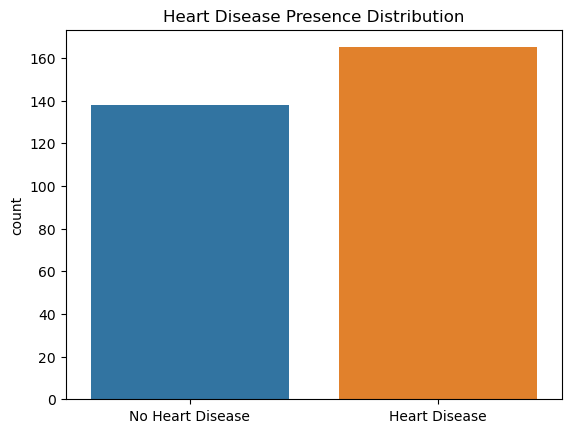

In [36]:
f = sns.countplot(x = 'target',data=data)
f.set_title("Heart Disease Presence Distribution")
f.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.xlabel("")
plt.show()

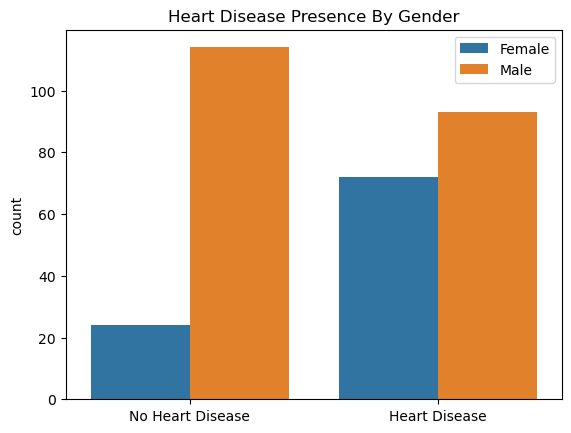

In [37]:
f = sns.countplot(x='target', data=data, hue='sex')
plt.legend(['Female','Male'])
f.set_title("Heart Disease Presence By Gender")
f.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.xlabel("")
plt.show()

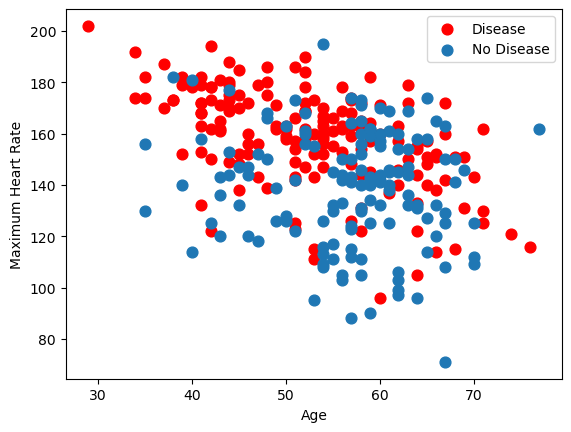

In [38]:
plt.scatter(x=data.age[data.target == 1],y=data.thalach[(data.target == 1)], c='red',s=60)
plt.scatter(x=data.age[data.target == 0], y=data.thalach[(data.target == 0)], s=60)
plt.legend(["Disease","No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [39]:
data = data.apply(pd.to_numeric)

In [40]:
X = np.array(data.drop('target', axis=1))
y = np.array(data['target'])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [42]:
Y_train = to_categorical(y_train,num_classes=None)
Y_test = to_categorical(y_test,num_classes=None)
print(Y_train.shape)
print(Y_train[:10])

(242, 2)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [43]:
def create_model():
    # Create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [44]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                224       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378 (1.48 KB)
Trainable params: 378 (1.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [45]:
history=model.fit(X_train,Y_train, validation_data= (X_test, Y_test),epochs=200, batch_size=10, verbose=10)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

<function matplotlib.pyplot.show(close=None, block=None)>

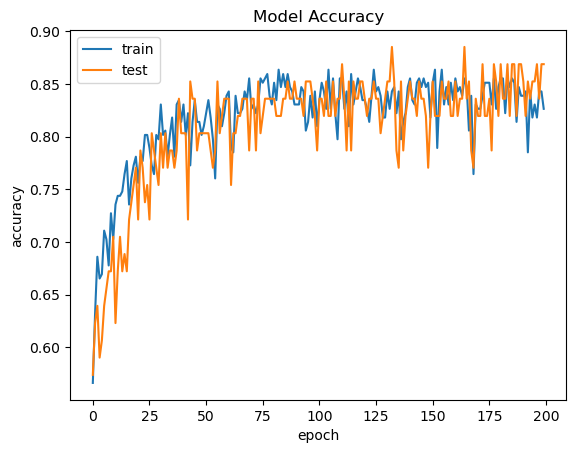

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

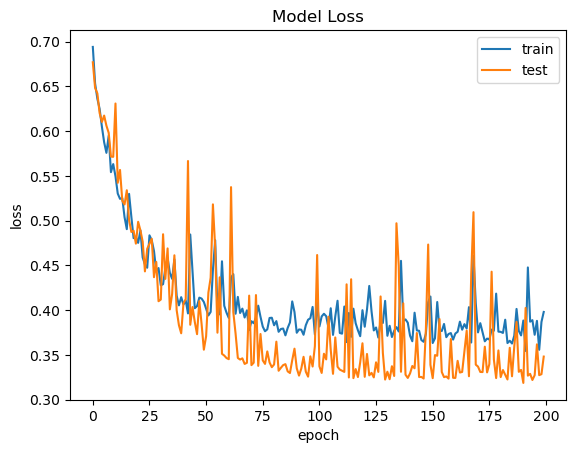

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show

In [48]:
categorical_pred = np.argmax(model.predict(X_test),axis=1)
print('Results For Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

2/2 [==============================] - 0s 0s/step
Results For Categorical Model
0.8688524590163934
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        28
           1       0.90      0.85      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [49]:
print("Predict New Patiant:",np.argmax(model.predict(np.array([[68,1,0,144,193,1,1,141,0,3.4,1,2,3]])),axis=1))

1/1 [==============================] - 0s 20ms/step
Predict New Patiant: [0]
